<a href="https://colab.research.google.com/github/VikasAdhikari07/LLM-News-Classifier/blob/main/Unlabeled_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
 

In [2]:
from simpletransformers.language_representation import RepresentationModel

model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
import pandas as pd
# Preparing Dataset
df = pd.read_csv('sheet.csv')

In [5]:
sentence_vectors = model.encode_sentences(df['Text'].tolist(), combine_strategy="mean")

In [6]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


<ipython-input-7-2b3a28903999>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], cmap='viridis')


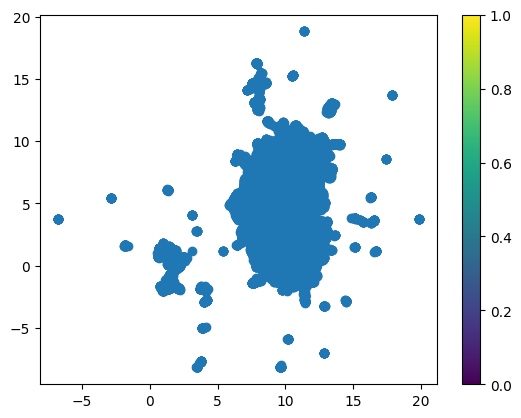

In [7]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Reduce embeddings to 2D for visualization
reducer = umap.UMAP()
embeddings_2d = reducer.fit_transform(sentence_vectors)

# Plot clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], cmap='viridis')
plt.colorbar()
plt.show()

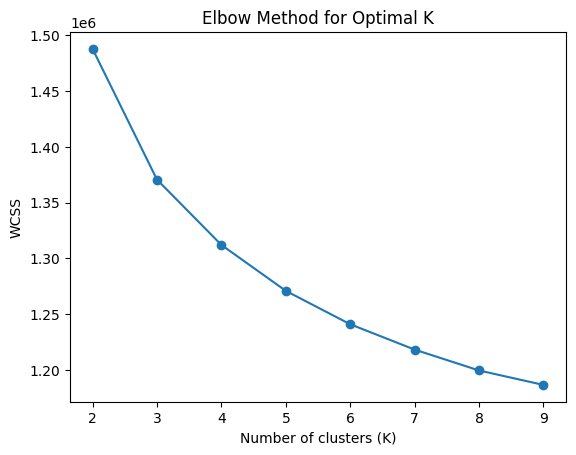

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++')
    kmeans.fit(sentence_vectors)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(sentence_vectors)

In [ ]:
# prompt: 3d visualization by reducing embedding using umap

from mpl_toolkits.mplot3d import Axes3D

# Reduce embeddings to 3D for visualization
reducer = umap.UMAP(n_components=3)
embeddings_3d = reducer.fit_transform(sentence_vectors)

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

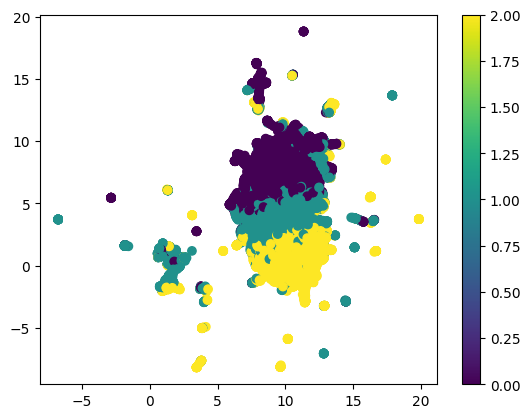

In [10]:
# Reduce embeddings to 2D for visualization
# reducer = umap.UMAP()
# embeddings_2d = reducer.fit_transform(sentence_vectors)

# Plot clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],c= cluster_labels, cmap='viridis')
plt.colorbar()
plt.show()

In [11]:
cluster_data = pd.DataFrame({'Text': df['Text'].tolist(), 'cluster': cluster_labels})

In [12]:
for i in cluster_data['cluster'].unique():
  total_number = cluster_data[cluster_data['cluster']==i].shape[0]
  print(f"The total number of {i}th cluster is {total_number}")

The total number of 0th cluster is 17370
The total number of 1th cluster is 15612
The total number of 2th cluster is 13135


In [27]:
cluster_data[cluster_data['cluster']==0] # Economic, Political, crime

,Text,cluster
0,"Moeller's student-run newspaper, The Crusader,...",0
12,Quite a number of countermeasures have been in...,0
15,The lacrosse team have won two state titles an...,0
16,Moeller High School's athletic teams - with th...,0
17,"Recently, Moeller unveiled plans to build a mu...",0
...,...,...
46108,"Other social movements, such as the first-wave...",0
46111,Vancouver has been ranked one of the most liva...,0
46112,Vancouver's characteristic approach to urban p...,0
46113,Vancouver is also considered to have the worst...,0


In [26]:
cluster_data[cluster_data['cluster']==1] #  Crime And Political Related

,Text,cluster
1,"In 2008, The Crusader won First Place, the sec...",1
2,The Squire is a student literary journal that ...,1
8,Archbishop Moeller High School was established...,1
10,"When it opened its doors in 1960, Moeller High...",1
22,The circular flow of income is a concept for b...,1
...,...,...
46101,The explorer and North West Company trader Sim...,1
46103,The settlement which came to be called Gastown...,1
46104,The City of Vancouver was incorporated on 6 Ap...,1
46109,Amalgamation with Point Grey and South Vancouv...,1


In [28]:
cluster_data[cluster_data['cluster']==2] # Other news

,Text,cluster
3,Paul Keels - play-by-play announcer for Ohio S...,2
4,Joe Uecker - Ohio State Senator (R-66) .,2
5,Rico Murray - Undrafted free agent signee by t...,2
6,Tony Hunter - professional football player for...,2
7,Jack Norris - President and co-founder of Vega...,2
...,...,...
46091,Many past and current TV shows have been filme...,2
46092,Libraries in Vancouver include the Vancouver P...,2
46105,Vancouver merchants outfitted prospectors boun...,2
46110,", Vancouver is the most densely populated city...",2
